Parameter searching: https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv \
Renaming the last column: https://stackoverflow.com/questions/56479835/rename-only-the-last-column-in-pandas-dataframe-accounting-for-duplicate-header

Preperation

In [1]:
import pandas
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib as plt

c:\Users\victo\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
import sklearn
print(sklearn.__version__)

1.0.2


In [2]:
#loading in dataset normal, STM and BerTopic
df = pandas.read_csv("G:\\Master\\Block 3\\Thesis\\Dungeon\\dungeon_final.csv")
df_STM = pandas.read_csv("G:\\Master\\Block 3\\Thesis\\Dungeon\\features_Dungeon_STM.csv")
df_Bert = pandas.read_csv("G:\\Master\\Block 3\\Thesis\\Dungeon\\Features_Dungeon_Bert_reduction.csv")
df_STM_selected = pandas.read_csv("G:\\Master\\Block 3\\Thesis\\Dungeon\\Dungeon_featured_selected_STM.csv")
df_Bert_selected = pandas.read_csv("G:\\Master\\Block 3\\Thesis\\Dungeon\\Dungeon_featured_selected_Bert.csv")

In [3]:
df_STM.columns = [*df_STM.columns[:-1], 'sentiment']

In [5]:
df_STM

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V112,V113,V114,V115,V116,V117,V118,V119,V120,sentiment
0,0.001089,0.009702,0.020566,0.013084,0.002935,0.000625,0.013087,0.000229,0.008449,0.001161,...,0.001070,0.000228,0.000813,0.000244,0.001883,0.006174,0.000789,0.000627,0.002293,0
1,0.000899,0.011444,0.007819,0.013961,0.002293,0.000377,0.009079,0.000149,0.014052,0.001108,...,0.003235,0.000240,0.004049,0.000207,0.002518,0.002555,0.000498,0.001693,0.002264,0
2,0.001761,0.008275,0.005606,0.011038,0.001675,0.000308,0.004883,0.000167,0.012181,0.000977,...,0.006799,0.000210,0.003072,0.000522,0.002364,0.001739,0.000405,0.001074,0.002432,0
3,0.001186,0.004810,0.007594,0.048781,0.001574,0.000424,0.004308,0.000142,0.013870,0.000853,...,0.001974,0.000187,0.003104,0.000359,0.001884,0.003372,0.000564,0.001806,0.002076,0
4,0.001220,0.002610,0.004544,0.011449,0.002132,0.000459,0.004296,0.000327,0.013348,0.000791,...,0.009786,0.000138,0.002863,0.000765,0.004285,0.002055,0.000905,0.001165,0.002796,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23535,0.000675,0.013281,0.003671,0.008411,0.013757,0.013231,0.004524,0.000430,0.006005,0.000878,...,0.047478,0.001388,0.000604,0.000614,0.036083,0.001506,0.002012,0.000300,0.001842,1
23536,0.000664,0.004535,0.006504,0.020917,0.004546,0.000573,0.007687,0.000187,0.019356,0.000952,...,0.004701,0.492255,0.001260,0.000382,0.004326,0.001039,0.000834,0.000177,0.001741,1
23537,0.001303,0.031947,0.005099,0.030750,0.006701,0.001019,0.011551,0.000625,0.015561,0.001541,...,0.002134,0.001300,0.002335,0.000222,0.003114,0.002778,0.001109,0.000347,0.002301,1
23538,0.000634,0.005594,0.006251,0.017025,0.002473,0.000660,0.016071,0.000136,0.011134,0.000974,...,0.003673,0.408097,0.000732,0.000177,0.008117,0.000524,0.001079,0.000325,0.001473,0


In [6]:
df_Bert

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,111,112,113,114,115,116,117,118,119,sentiment
0,0,1.554550e-02,1.081630e-01,5.663138e-02,2.333239e-03,3.596339e-02,2.098619e-03,2.364012e-02,5.254515e-03,6.838805e-03,...,1.165053e-03,4.567182e-03,3.278959e-03,2.556096e-03,2.139480e-03,1.673649e-03,2.630820e-03,3.593357e-03,1.478194e-03,0
1,1,6.519406e-03,8.169974e-03,2.608046e-02,9.225114e-04,3.512590e-02,1.206870e-03,2.487019e-02,2.956705e-03,5.401715e-03,...,7.102972e-04,5.733551e-03,4.230669e-03,2.152340e-03,1.521066e-03,1.196298e-03,2.406235e-03,3.932182e-03,4.843089e-04,0
2,2,8.509663e-307,1.000000e+00,3.784100e-306,1.556598e-307,2.065353e-306,1.298450e-307,1.291607e-306,2.963634e-307,4.050248e-307,...,7.147302e-308,2.582192e-307,1.791893e-307,1.400413e-307,1.195653e-307,1.024952e-307,1.576184e-307,1.925494e-307,9.259370e-308,0
3,3,1.051417e-306,2.016642e-306,9.047224e-306,1.369693e-307,4.872387e-306,1.601557e-307,2.919845e-306,4.303837e-307,6.876297e-307,...,9.257109e-308,7.845563e-307,4.551687e-307,2.742387e-307,2.091530e-307,1.497740e-307,2.953929e-307,4.720487e-307,7.251976e-308,0
4,4,1.707980e-306,5.874200e-307,1.161093e-306,8.777461e-308,1.801795e-306,1.510206e-307,3.794988e-306,7.456014e-307,5.806310e-307,...,9.384838e-308,2.244154e-307,4.294892e-307,4.862144e-307,2.677420e-307,1.300161e-307,1.668917e-307,7.690572e-307,6.718824e-308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23560,23560,7.206797e-03,4.045883e-03,8.242443e-03,7.917606e-04,1.409944e-02,1.749929e-03,3.167182e-02,1.859028e-02,6.202524e-03,...,1.161423e-03,1.671172e-03,3.111742e-03,6.347289e-03,4.234082e-03,1.459434e-03,1.529516e-03,3.492920e-03,6.021542e-04,1
23561,23561,3.115431e-04,1.818786e-04,3.693197e-04,2.805660e-05,6.146754e-04,6.753109e-05,1.191088e-03,1.273958e-03,2.812027e-04,...,5.278478e-05,7.177979e-05,1.207654e-04,2.146819e-04,2.141143e-04,7.620899e-05,7.412592e-05,1.261484e-04,2.136162e-05,1
23562,23562,8.326945e-307,5.434685e-307,1.179855e-306,9.456703e-308,2.204470e-306,1.831498e-307,1.000000e+00,6.626891e-307,1.082098e-306,...,1.186582e-307,2.706973e-307,1.265684e-306,1.189955e-306,4.832029e-307,1.863678e-307,2.391894e-307,1.040852e-306,6.045012e-308,1
23563,23563,3.114336e-04,1.817410e-04,3.690426e-04,2.801808e-05,6.141782e-04,6.737864e-05,1.192123e-03,1.269790e-03,2.810003e-04,...,5.265604e-05,7.173171e-05,1.208083e-04,2.151753e-04,2.140637e-04,7.609164e-05,7.406042e-05,1.262463e-04,2.132820e-05,0


In [3]:
df_STM_selected

,V1,V2,V3,V4,V5,V6,V7,V8,V10,V11,...,V110,V111,V112,V113,V115,V116,V117,V119,V120,sentiment
0,0.001089,0.009702,0.020566,0.013084,0.002935,0.000625,0.013087,0.000229,0.001161,0.005097,...,0.049348,0.000641,0.001070,0.000228,0.000244,0.001883,0.006174,0.000627,0.002293,0
1,0.000899,0.011444,0.007819,0.013961,0.002293,0.000377,0.009079,0.000149,0.001108,0.003534,...,0.103904,0.001230,0.003235,0.000240,0.000207,0.002518,0.002555,0.001693,0.002264,0
2,0.001761,0.008275,0.005606,0.011038,0.001675,0.000308,0.004883,0.000167,0.000977,0.004857,...,0.029561,0.002055,0.006799,0.000210,0.000522,0.002364,0.001739,0.001074,0.002432,0
3,0.001186,0.004810,0.007594,0.048781,0.001574,0.000424,0.004308,0.000142,0.000853,0.002419,...,0.046800,0.001687,0.001974,0.000187,0.000359,0.001884,0.003372,0.001806,0.002076,0
4,0.001220,0.002610,0.004544,0.011449,0.002132,0.000459,0.004296,0.000327,0.000791,0.002498,...,0.010229,0.002668,0.009786,0.000138,0.000765,0.004285,0.002055,0.001165,0.002796,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23535,0.000675,0.013281,0.003671,0.008411,0.013757,0.013231,0.004524,0.000430,0.000878,0.006167,...,0.013332,0.001247,0.047478,0.001388,0.000614,0.036083,0.001506,0.000300,0.001842,1
23536,0.000664,0.004535,0.006504,0.020917,0.004546,0.000573,0.007687,0.000187,0.000952,0.014038,...,0.002956,0.000732,0.004701,0.492255,0.000382,0.004326,0.001039,0.000177,0.001741,1
23537,0.001303,0.031947,0.005099,0.030750,0.006701,0.001019,0.011551,0.000625,0.001541,0.005669,...,0.009674,0.000801,0.002134,0.001300,0.000222,0.003114,0.002778,0.000347,0.002301,1
23538,0.000634,0.005594,0.006251,0.017025,0.002473,0.000660,0.016071,0.000136,0.000974,0.012201,...,0.019680,0.000593,0.003673,0.408097,0.000177,0.008117,0.000524,0.000325,0.001473,0


In [4]:
df_Bert_selected

,0,1,2,3,4,6,7,8,10,11,...,109,110,112,113,114,115,117,118,119,sentiment
0,1.554550e-02,1.081630e-01,5.663138e-02,2.333239e-03,3.596339e-02,2.364012e-02,5.254515e-03,6.838805e-03,8.749989e-03,1.507250e-02,...,2.837752e-03,4.033641e-03,4.567182e-03,3.278959e-03,2.556096e-03,2.139480e-03,2.630820e-03,3.593357e-03,1.478194e-03,0
1,6.519406e-03,8.169974e-03,2.608046e-02,9.225114e-04,3.512590e-02,2.487019e-02,2.956705e-03,5.401715e-03,6.349214e-03,1.602588e-02,...,2.957609e-03,7.012775e-03,5.733551e-03,4.230669e-03,2.152340e-03,1.521066e-03,2.406235e-03,3.932182e-03,4.843089e-04,0
2,8.509663e-307,1.000000e+00,3.784100e-306,1.556598e-307,2.065353e-306,1.291607e-306,2.963634e-307,4.050248e-307,5.168233e-307,8.602949e-307,...,1.580669e-307,2.248323e-307,2.582192e-307,1.791893e-307,1.400413e-307,1.195653e-307,1.576184e-307,1.925494e-307,9.259370e-308,0
3,1.051417e-306,2.016642e-306,9.047224e-306,1.369693e-307,4.872387e-306,2.919845e-306,4.303837e-307,6.876297e-307,8.061368e-307,2.002931e-306,...,3.560482e-307,7.166419e-307,7.845563e-307,4.551687e-307,2.742387e-307,2.091530e-307,2.953929e-307,4.720487e-307,7.251976e-308,0
4,1.707980e-306,5.874200e-307,1.161093e-306,8.777461e-308,1.801795e-306,3.794988e-306,7.456014e-307,5.806310e-307,9.759840e-307,9.346771e-307,...,2.672976e-307,2.534479e-307,2.244154e-307,4.294892e-307,4.862144e-307,2.677420e-307,1.668917e-307,7.690572e-307,6.718824e-308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23560,7.206797e-03,4.045883e-03,8.242443e-03,7.917606e-04,1.409944e-02,3.167182e-02,1.859028e-02,6.202524e-03,1.439559e-02,8.029826e-03,...,2.473415e-03,1.917724e-03,1.671172e-03,3.111742e-03,6.347289e-03,4.234082e-03,1.529516e-03,3.492920e-03,6.021542e-04,1
23561,3.115431e-04,1.818786e-04,3.693197e-04,2.805660e-05,6.146754e-04,1.191088e-03,1.273958e-03,2.812027e-04,7.925056e-04,3.483617e-04,...,1.069481e-04,8.197761e-05,7.177979e-05,1.207654e-04,2.146819e-04,2.141143e-04,7.412592e-05,1.261484e-04,2.136162e-05,1
23562,8.326945e-307,5.434685e-307,1.179855e-306,9.456703e-308,2.204470e-306,1.000000e+00,6.626891e-307,1.082098e-306,1.641643e-306,1.236296e-306,...,5.193479e-307,3.492160e-307,2.706973e-307,1.265684e-306,1.189955e-306,4.832029e-307,2.391894e-307,1.040852e-306,6.045012e-308,1
23563,3.114336e-04,1.817410e-04,3.690426e-04,2.801808e-05,6.141782e-04,1.192123e-03,1.269790e-03,2.810003e-04,7.912760e-04,3.479749e-04,...,1.069102e-04,8.193666e-05,7.173171e-05,1.208083e-04,2.151753e-04,2.140637e-04,7.406042e-05,1.262463e-04,2.132820e-05,0


In [4]:
#vectorizing the bag of words
vectorizer_model = CountVectorizer(min_df = 5)


In [5]:
#splitting the columns in X and y
bow_X = vectorizer_model.fit_transform(df["review_text"].values)
bow_y = df["review_score"].values
STM_X = df_STM.drop("sentiment", axis=1)
STM_X = STM_X.values
STM_y = df_STM["sentiment"].values
STM_X_selected = df_STM_selected.drop("sentiment", axis = 1)
STM_y_selected = df_STM_selected["sentiment"].values
Bert_X = df_Bert.drop(["sentiment", "Unnamed: 0"], axis=1)
Bert_X = Bert_X.values
Bert_y = df_Bert["sentiment"].values
Bert_X_selected = df_Bert_selected.drop("sentiment", axis = 1)
Bert_y_selected = df_Bert_selected["sentiment"].values

In [9]:
bow_X

<23543x13382 sparse matrix of type '<class 'numpy.int64'>'
	with 1828569 stored elements in Compressed Sparse Row format>

In [6]:
#splitting the sets
bow_X_train, bow_X_test, bow_y_train, bow_y_test = train_test_split(bow_X, bow_y, random_state = 101)
STM_X_train, STM_X_test, STM_y_train, STM_y_test = train_test_split(STM_X, STM_y, random_state = 101)
Bert_X_train, Bert_X_test, Bert_y_train, Bert_y_test = train_test_split(Bert_X, Bert_y, random_state = 101)
STM_X_selected_train, STM_X_selected_test, STM_y_selected_train, STM_y_selected_test = train_test_split(STM_X_selected,STM_y_selected, random_state=101)
Bert_X_selected_train, Bert_X_selected_test, Bert_y_selected_train, Bert_y_selected_test = train_test_split(Bert_X_selected,Bert_y_selected, random_state=101)

In [7]:
le_bow = preprocessing.LabelEncoder()
bow_y_train = le_bow.fit_transform(bow_y_train)
bow_y_test = le_bow.transform(bow_y_test)

In [8]:
le_stm = preprocessing.LabelEncoder()
STM_y_train = le_stm.fit_transform(STM_y_train)
STM_y_test = le_stm.transform(STM_y_test)

In [9]:
le_bert = preprocessing.LabelEncoder()
Bert_y_train = le_bert.fit_transform(Bert_y_train)
Bert_y_test = le_bert.transform(Bert_y_test)

In [10]:
le_stm_selected = preprocessing.LabelEncoder()
STM_y_selected_train = le_stm.fit_transform(STM_y_selected_train)
STM_y_selected_test = le_stm.transform(STM_y_selected_test)

In [11]:
le_bert_selected = preprocessing.LabelEncoder()
Bert_y_selected_train = le_bert.fit_transform(Bert_y_selected_train)
Bert_y_selected_test = le_bert.transform(Bert_y_selected_test)

Logistic Regression

In [16]:
LR = LogisticRegression(random_state=101, max_iter=1000) 

In [17]:
parameters_LR = {"C": np.logspace(-4, 4, 20), "class_weight":[None, "balanced"], "solver": ["liblinear", "lbfgs"]}

In [18]:
#BOW
Randomized_search_LR_BOW = RandomizedSearchCV(LR, parameters_LR, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_LR_BOW.fit(bow_X_train, bow_y_train)
print(" Results from Randomized Search " )
print("\\\\n The best estimator across ALL searched params:\\\\n",Randomized_search_LR_BOW.best_estimator_)
print("\\\\n The best score across ALL searched params:\\\\n",Randomized_search_LR_BOW.best_score_)
print("\\\\n The best parameters across ALL searched params:\\\\n",Randomized_search_LR_BOW.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Randomized Search 
\\n The best estimator across ALL searched params:\\n LogisticRegression(C=0.08858667904100823, class_weight='balanced',
                   max_iter=1000, random_state=101, solver='liblinear')
\\n The best score across ALL searched params:\\n 0.6983480196414329
\\n The best parameters across ALL searched params:\\n {'solver': 'liblinear', 'class_weight': 'balanced', 'C': 0.08858667904100823}


In [19]:
#BOW final
LR_final_BOW = Randomized_search_LR_BOW.best_estimator_
LR_final_BOW.fit(bow_X_train, bow_y_train)
bow_y_pred_LR = LR_final_BOW.predict(bow_X_test)
#test score
f1_score(bow_y_test, bow_y_pred_LR)

0.710394265232975

In [20]:
#STM
Randomized_search_LR_STM = RandomizedSearchCV(LR, parameters_LR, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_LR_STM.fit(STM_X_train, STM_y_train)
print(" Results from Randomized Search " )
print("\\\\n The best estimator across ALL searched params:\\\\n",Randomized_search_LR_STM.best_estimator_)
print("\\\\n The best score across ALL searched params:\\\\n",Randomized_search_LR_STM.best_score_)
print("\\\\n The best parameters across ALL searched params:\\\\n",Randomized_search_LR_STM.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Randomized Search 
\\n The best estimator across ALL searched params:\\n LogisticRegression(C=206.913808111479, class_weight='balanced', max_iter=1000,
                   random_state=101)
\\n The best score across ALL searched params:\\n 0.6173189337214484
\\n The best parameters across ALL searched params:\\n {'solver': 'lbfgs', 'class_weight': 'balanced', 'C': 206.913808111479}


In [21]:
#STM final
LR_final_STM = Randomized_search_LR_STM.best_estimator_
LR_final_STM.fit(STM_X_train, STM_y_train)
STM_y_pred_LR = LR_final_STM.predict(STM_X_test)
#test score
f1_score(STM_y_test, STM_y_pred_LR)

0.6275478690549723

In [22]:
#STM selected
Randomized_search_LR_STM_selected = RandomizedSearchCV(LR, parameters_LR, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_LR_STM_selected.fit(STM_X_selected_train, STM_y_selected_train)
print(" Results from Randomized Search " )
print("\\\\n The best estimator across ALL searched params:\\\\n",Randomized_search_LR_STM_selected.best_estimator_)
print("\\\\n The best score across ALL searched params:\\\\n",Randomized_search_LR_STM_selected.best_score_)
print("\\\\n The best parameters across ALL searched params:\\\\n",Randomized_search_LR_STM_selected.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Randomized Search 
\\n The best estimator across ALL searched params:\\n LogisticRegression(C=11.288378916846883, class_weight='balanced', max_iter=1000,
                   random_state=101, solver='liblinear')
\\n The best score across ALL searched params:\\n 0.6111168855500665
\\n The best parameters across ALL searched params:\\n {'solver': 'liblinear', 'class_weight': 'balanced', 'C': 11.288378916846883}


In [23]:
#STM selected final
LR_final_STM_selected = Randomized_search_LR_STM_selected.best_estimator_
LR_final_STM_selected.fit(STM_X_selected_train, STM_y_selected_train)
STM_y_selected_pred_LR = LR_final_STM_selected.predict(STM_X_selected_test)
#test score
f1_score(STM_y_selected_test, STM_y_selected_pred_LR)

0.6275968992248062

In [24]:
#BERTopic
Randomized_search_LR_Bert = RandomizedSearchCV(LR, parameters_LR, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_LR_Bert.fit(Bert_X_train, Bert_y_train)
print(" Results from Randomized Search " )
print("\\\\n The best estimator across ALL searched params:\\\\n",Randomized_search_LR_Bert.best_estimator_)
print("\\\\n The best score across ALL searched params:\\\\n",Randomized_search_LR_Bert.best_score_)
print("\\\\n The best parameters across ALL searched params:\\\\n",Randomized_search_LR_Bert.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Randomized Search 
\\n The best estimator across ALL searched params:\\n LogisticRegression(C=78.47599703514607, class_weight='balanced', max_iter=1000,
                   random_state=101, solver='liblinear')
\\n The best score across ALL searched params:\\n 0.48916438711040655
\\n The best parameters across ALL searched params:\\n {'solver': 'liblinear', 'class_weight': 'balanced', 'C': 78.47599703514607}


In [25]:
#BERT final 0.48 veel features, 0.42 outlier reduction
LR_final_Bert = Randomized_search_LR_Bert.best_estimator_
LR_final_Bert.fit(Bert_X_train, Bert_y_train)
Bert_y_pred_LR = LR_final_Bert.predict(Bert_X_test)
#test score
f1_score(Bert_y_test, Bert_y_pred_LR)

0.4782742681047765

In [13]:
LR2 = LogisticRegression(C=78.47599703514607, class_weight='balanced', max_iter=1000, random_state=101, solver='liblinear')

In [17]:
LR2.fit(Bert_X_train, Bert_y_train)
Bert_y_pred_LR = LR2.predict(Bert_X_test)
#test score
print(f1_score(Bert_y_test, Bert_y_pred_LR))
cm = confusion_matrix(Bert_y_test, Bert_y_pred_LR)

0.4782742681047765


In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR2.classes_)

AttributeError: module 'matplotlib' has no attribute 'show'

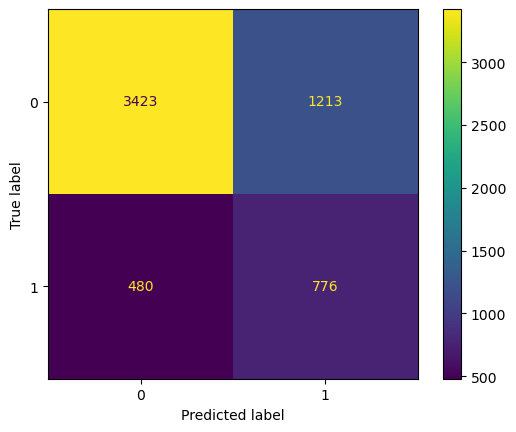

In [22]:
disp.plot()
plt.show()

In [26]:
#Bertopic selected
Randomized_search_LR_Bert_selected = RandomizedSearchCV(LR, parameters_LR, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_LR_Bert_selected.fit(Bert_X_selected_train, Bert_y_selected_train)
print(" Results from Randomized Search " )
print("\\\\n The best estimator across ALL searched params:\\\\n",Randomized_search_LR_Bert_selected.best_estimator_)
print("\\\\n The best score across ALL searched params:\\\\n",Randomized_search_LR_Bert_selected.best_score_)
print("\\\\n The best parameters across ALL searched params:\\\\n",Randomized_search_LR_Bert_selected.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Randomized Search 
\\n The best estimator across ALL searched params:\\n LogisticRegression(C=10000.0, class_weight='balanced', max_iter=1000,
                   random_state=101, solver='liblinear')
\\n The best score across ALL searched params:\\n 0.4840879301824564
\\n The best parameters across ALL searched params:\\n {'solver': 'liblinear', 'class_weight': 'balanced', 'C': 10000.0}


In [27]:
#Bertopic selected final
LR_final_Bert_selected = Randomized_search_LR_Bert_selected.best_estimator_
LR_final_Bert_selected.fit(Bert_X_selected_train, Bert_y_selected_train)
Bert_y_selected_pred_LR = LR_final_Bert_selected.predict(Bert_X_selected_test)
#test score
f1_score(Bert_y_selected_test, Bert_y_selected_pred_LR)

0.4691191360107998

Linear Support vector Machine

In [28]:
SVM = LinearSVC(random_state=101)

In [29]:
parameters_SVM = {"C": np.logspace(-4, 4, 20), "class_weight":[None, "balanced"], "loss": ["hinge", "squared_hinge"]} 

In [30]:
#BOW
Randomized_search_SVM_BOW = RandomizedSearchCV(SVM, parameters_SVM, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_SVM_BOW.fit(bow_X_train, bow_y_train)
print(" Results from Randomized Search " )
print("\\\\n The best estimator across ALL searched params:\\\\n",Randomized_search_SVM_BOW.best_estimator_)
print("\\\\n The best score across ALL searched params:\\\\n",Randomized_search_SVM_BOW.best_score_)
print("\\\\n The best parameters across ALL searched params:\\\\n",Randomized_search_SVM_BOW.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Randomized Search 
\\n The best estimator across ALL searched params:\\n LinearSVC(C=0.23357214690901212, class_weight='balanced', random_state=101)
\\n The best score across ALL searched params:\\n 0.646745142179632
\\n The best parameters across ALL searched params:\\n {'loss': 'squared_hinge', 'class_weight': 'balanced', 'C': 0.23357214690901212}


c:\Users\victo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [31]:
#BOW final
SVM_final_BOW = Randomized_search_SVM_BOW.best_estimator_
SVM_final_BOW.fit(bow_X_train, bow_y_train)
bow_y_pred_SVM = SVM_final_BOW.predict(bow_X_test)
#test score
f1_score(bow_y_test, bow_y_pred_SVM)

c:\Users\victo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6433837795886689

In [32]:
#STM
Randomized_search_SVM_STM = RandomizedSearchCV(SVM, parameters_SVM, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_SVM_STM.fit(STM_X_train, STM_y_train)
print(" Results from Randomized Search " )
print("\\\\n The best estimator across ALL searched params:\\\\n",Randomized_search_SVM_STM.best_estimator_)
print("\\\\n The best score across ALL searched params:\\\\n",Randomized_search_SVM_STM.best_score_)
print("\\\\n The best parameters across ALL searched params:\\\\n",Randomized_search_SVM_STM.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Randomized Search 
\\n The best estimator across ALL searched params:\\n LinearSVC(C=545.5594781168514, class_weight='balanced', random_state=101)
\\n The best score across ALL searched params:\\n 0.5875047527680077
\\n The best parameters across ALL searched params:\\n {'loss': 'squared_hinge', 'class_weight': 'balanced', 'C': 545.5594781168514}


c:\Users\victo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [33]:
#STM final
SVM_final_STM = Randomized_search_SVM_STM.best_estimator_
SVM_final_STM.fit(STM_X_train, STM_y_train)
STM_y_pred_SVM = SVM_final_STM.predict(STM_X_test)
#test score
f1_score(STM_y_test, STM_y_pred_SVM)

c:\Users\victo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.5844490216271885

In [34]:
#STM selected
Randomized_search_SVM_STM_selected = RandomizedSearchCV(SVM, parameters_SVM, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_SVM_STM_selected.fit(STM_X_selected_train, STM_y_selected_train)
print(" Results from Randomized Search " )
print("\\\\n The best estimator across ALL searched params:\\\\n",Randomized_search_SVM_STM_selected.best_estimator_)
print("\\\\n The best score across ALL searched params:\\\\n",Randomized_search_SVM_STM_selected.best_score_)
print("\\\\n The best parameters across ALL searched params:\\\\n",Randomized_search_SVM_STM_selected.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Randomized Search 
\\n The best estimator across ALL searched params:\\n LinearSVC(C=29.763514416313132, class_weight='balanced', loss='hinge',
          random_state=101)
\\n The best score across ALL searched params:\\n 0.6105825495065169
\\n The best parameters across ALL searched params:\\n {'loss': 'hinge', 'class_weight': 'balanced', 'C': 29.763514416313132}


c:\Users\victo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [35]:
#STM selected final
SVM_final_STM_selected = Randomized_search_SVM_STM_selected.best_estimator_
SVM_final_STM_selected.fit(STM_X_selected_train, STM_y_selected_train)
STM_y_selected_pred_SVM = SVM_final_STM_selected.predict(STM_X_selected_test)
#test score
f1_score(STM_y_selected_test, STM_y_selected_pred_SVM)

c:\Users\victo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6305911792305287

In [36]:
#BERTopic
Randomized_search_SVM_Bert = RandomizedSearchCV(SVM, parameters_SVM, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_SVM_Bert.fit(Bert_X_train, Bert_y_train)
print(" Results from Randomized Search " )
print("\\\\n The best estimator across ALL searched params:\\\\n",Randomized_search_SVM_Bert.best_estimator_)
print("\\\\n The best score across ALL searched params:\\\\n",Randomized_search_SVM_Bert.best_score_)
print("\\\\n The best parameters across ALL searched params:\\\\n",Randomized_search_SVM_Bert.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Randomized Search 
\\n The best estimator across ALL searched params:\\n LinearSVC(C=0.615848211066026, class_weight='balanced', random_state=101)
\\n The best score across ALL searched params:\\n 0.4945809432992479
\\n The best parameters across ALL searched params:\\n {'loss': 'squared_hinge', 'class_weight': 'balanced', 'C': 0.615848211066026}


In [37]:
#BERT final 0.47, 0.42 reduction
SVM_final_Bert = Randomized_search_SVM_Bert.best_estimator_
SVM_final_Bert.fit(Bert_X_train, Bert_y_train)
Bert_y_pred_SVM = SVM_final_Bert.predict(Bert_X_test)
#test score
f1_score(Bert_y_test, Bert_y_pred_SVM)

0.47153965785381025

In [38]:
#Bertopic selected
Randomized_search_SVM_Bert_selected = RandomizedSearchCV(SVM, parameters_SVM, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_SVM_Bert_selected.fit(Bert_X_selected_train, Bert_y_selected_train)
print(" Results from Randomized Search " )
print("\\\\n The best estimator across ALL searched params:\\\\n",Randomized_search_SVM_Bert_selected.best_estimator_)
print("\\\\n The best score across ALL searched params:\\\\n",Randomized_search_SVM_Bert_selected.best_score_)
print("\\\\n The best parameters across ALL searched params:\\\\n",Randomized_search_SVM_Bert_selected.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Randomized Search 
\\n The best estimator across ALL searched params:\\n LinearSVC(C=0.615848211066026, class_weight='balanced', loss='hinge',
          random_state=101)
\\n The best score across ALL searched params:\\n 0.4741281996289698
\\n The best parameters across ALL searched params:\\n {'loss': 'hinge', 'class_weight': 'balanced', 'C': 0.615848211066026}


c:\Users\victo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [39]:
#Bertopic selected final
SVM_final_Bert_selected = Randomized_search_SVM_Bert_selected.best_estimator_
SVM_final_Bert_selected.fit(Bert_X_selected_train, Bert_y_selected_train)
Bert_y_selected_pred_SVM = SVM_final_Bert_selected.predict(Bert_X_selected_test)
#test score
f1_score(Bert_y_selected_test, Bert_y_selected_pred_SVM)

c:\Users\victo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.4594395280235988

XGBClassifier

In [40]:
XGB = XGBClassifier(verbosity = 1, seed = 101, use_label_encoder=False)

In [41]:

parameters_XGB = {"colsample_bytree:": np.arange(0.5,1,0.1) ,"min_child_weight": np.arange(1,10,1), "eta": np.arange(0.01,0.3,0.05), "gamma": np.arange(0,5,1), "max_depth": np.arange(3,10,1), "subsample": np.arange(0.5,1,0.1), "scale_pos_weight": [1, 4.045069258], "objective": ["binary:logistic", "binary:logitraw", "binary:hinge"]}

In [42]:
#BOW
Randomized_search_XGB = RandomizedSearchCV(XGB, parameters_XGB, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_XGB.fit(bow_X_train, bow_y_train)
print(" Results from Randomized Search " )
print("\\\\n The best estimator across ALL searched params:\\\\n",Randomized_search_XGB.best_estimator_)
print("\\\\n The best score across ALL searched params:\\\\n",Randomized_search_XGB.best_score_)
print("\\\\n The best parameters across ALL searched params:\\\\n",Randomized_search_XGB.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[16:35:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "colsample_bytree:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:35:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Results from Randomized Search 
\\n The best estimator across ALL searched params:\\n XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             

In [43]:
#BOW final
XGB_final_BOW = Randomized_search_XGB.best_estimator_
XGB_final_BOW.fit(bow_X_train, bow_y_train)
bow_y_pred_XGB = XGB_final_BOW.predict(bow_X_test)
#test score
f1_score(bow_y_test, bow_y_pred_XGB)

[16:35:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "colsample_bytree:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:35:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6636925188743994

In [44]:
#STM
Randomized_search_XGB_STM = RandomizedSearchCV(XGB, parameters_XGB, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_XGB_STM.fit(STM_X_train, STM_y_train)
print(" Results from Randomized Search " )
print("\\\\n The best estimator across ALL searched params:\\\\n",Randomized_search_XGB_STM.best_estimator_)
print("\\\\n The best score across ALL searched params:\\\\n",Randomized_search_XGB_STM.best_score_)
print("\\\\n The best parameters across ALL searched params:\\\\n",Randomized_search_XGB_STM.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[16:42:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "colsample_bytree:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:42:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Results from Randomized Search 
\\n The best estimator across ALL searched params:\\n XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             

In [45]:
#STM final
XGB_final_STM = Randomized_search_XGB_STM.best_estimator_
XGB_final_STM.fit(STM_X_train, STM_y_train)
XGB_y_pred_STM = XGB_final_STM.predict(STM_X_test)
#test score
f1_score(STM_y_test, XGB_y_pred_STM)

[16:42:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "colsample_bytree:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:42:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.633828996282528

In [46]:
#STM selected
Randomized_search_XGB_STM_selected = RandomizedSearchCV(XGB, parameters_XGB, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_XGB_STM_selected.fit(STM_X_selected_train, STM_y_selected_train)
print(" Results from Randomized Search " )
print("\\\\n The best estimator across ALL searched params:\\\\n",Randomized_search_XGB_STM_selected.best_estimator_)
print("\\\\n The best score across ALL searched params:\\\\n",Randomized_search_XGB_STM_selected.best_score_)
print("\\\\n The best parameters across ALL searched params:\\\\n",Randomized_search_XGB_STM_selected.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\victo\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:49:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "colsample_bytree:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:49:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Results from Randomized Search 
\\n The best estimator across ALL searched params:\\n XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              colsam

In [47]:
#STM selected final
XGB_final_STM_selected = Randomized_search_XGB_STM_selected.best_estimator_
XGB_final_STM_selected.fit(STM_X_selected_train, STM_y_selected_train)
STM_y_selected_pred_XGB = XGB_final_STM_selected.predict(STM_X_selected_test)
#test score
f1_score(STM_y_selected_test, STM_y_selected_pred_XGB)

[16:49:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "colsample_bytree:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:49:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6400304414003044

In [48]:
#BERTopic
Randomized_search_XGB_Bert = RandomizedSearchCV(XGB, parameters_XGB, verbose=2, scoring="f1", n_jobs = 2)
Randomized_search_XGB_Bert.fit(Bert_X_train, Bert_y_train)
print(" Results from Randomized Search " )
print("\\\\n The best estimator across ALL searched params:\\\\n",Randomized_search_XGB_Bert.best_estimator_)
print("\\\\n The best score across ALL searched params:\\\\n",Randomized_search_XGB_Bert.best_score_)
print("\\\\n The best parameters across ALL searched params:\\\\n",Randomized_search_XGB_Bert.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[16:53:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "colsample_bytree:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:53:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.4.0, the default evaluation metric used with the objective 'binary:logitraw' was changed from 'auc' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Results from Randomized Search 
\\n The best estimator across ALL searched params:\\n XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              c

In [49]:
#BERT final
XGB_final_Bert = Randomized_search_XGB_Bert.best_estimator_
XGB_final_Bert.fit(Bert_X_train, Bert_y_train)
Bert_y_pred_XGB = XGB_final_Bert.predict(Bert_X_test)
#test score
f1_score(Bert_y_test, Bert_y_pred_XGB)

[16:53:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "colsample_bytree:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:53:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.4.0, the default evaluation metric used with the objective 'binary:logitraw' was changed from 'auc' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5012185215272137

In [12]:
XGB2 = XGBClassifier(verbosity = 1, seed = 101, use_label_encoder=False, subsample =  0.8999999999999999, scale_pos_weight = 4.045069258, objective =  'binary:logitraw', min_child_weight = 2, max_depth = 4, gamma = 1, eta = 0.26, colsample_bytree = 0.7999999999999999)

In [14]:
#BERT final conf
XGB2.fit(Bert_X_train, Bert_y_train)
Bert_y_pred_XGB_con = XGB2.predict(Bert_X_test)
#test score
print(f1_score(Bert_y_test, Bert_y_pred_XGB_con))
cm = confusion_matrix(Bert_y_test, Bert_y_pred_XGB_con)

[23:33:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.4.0, the default evaluation metric used with the objective 'binary:logitraw' was changed from 'auc' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.4991883116883117


In [15]:
disp_XGB = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGB2.classes_,)

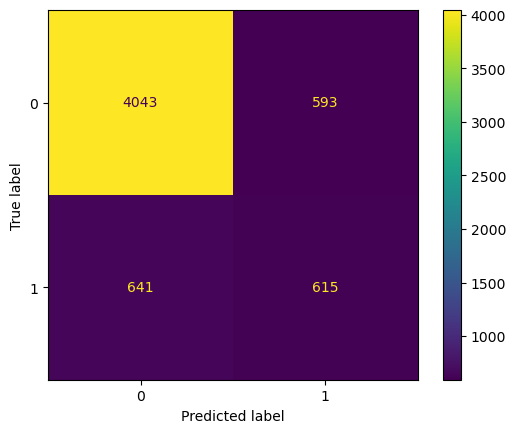

In [17]:
disp_XGB.plot()

In [50]:
#Bertopic selected
Randomized_search_XGB_Bert_selected = RandomizedSearchCV(XGB, parameters_XGB, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_XGB_Bert_selected.fit(Bert_X_selected_train, Bert_y_selected_train)
print(" Results from Randomized Search " )
print("\\\\n The best estimator across ALL searched params:\\\\n",Randomized_search_XGB_Bert_selected.best_estimator_)
print("\\\\n The best score across ALL searched params:\\\\n",Randomized_search_XGB_Bert_selected.best_score_)
print("\\\\n The best parameters across ALL searched params:\\\\n",Randomized_search_XGB_Bert_selected.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\victo\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:57:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "colsample_bytree:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:57:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.4.0, the default evaluation metric used with the objective 'binary:logitraw' was changed from 'auc' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Results from Randomized Search 
\\n The best estimator across ALL searched params:\\n XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, colsample_bytree:=0.6,

In [51]:
#Bertopic selected final
XGB_final_Bert_selected = Randomized_search_XGB_Bert_selected.best_estimator_
XGB_final_Bert_selected.fit(Bert_X_selected_train, Bert_y_selected_train)
Bert_y_selected_pred_XGB = XGB_final_Bert_selected.predict(Bert_X_selected_test)
#test score
f1_score(Bert_y_selected_test, Bert_y_selected_pred_XGB)

[16:57:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "colsample_bytree:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:57:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.4.0, the default evaluation metric used with the objective 'binary:logitraw' was changed from 'auc' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.4970513900589722